# Unit 5 - Financial Planning


In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
#! pip install alpaca_trade_api
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [25]:
# Fetch current BTC price
data_btc = requests.get(btc_url).json()
price_btc = data_btc['data']['1']['quotes']['CAD']['price']
#price_btc

# Fetch current ETH price
data_eth = requests.get(eth_url).json()
price_eth = data_eth['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * price_btc
my_eth_value = my_eth * price_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $86104.07
The current value of your 5.3 ETH is $11857.99


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [26]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [27]:
# Set Alpaca API key and secret
my_alpaca_api = os.getenv("ALPACA_API_KEY")
my_alpaca_secret = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api_object = tradeapi.REST(my_alpaca_api, my_alpaca_secret, api_version="v2")

In [28]:
# Format current date as ISO format
curr_date = pd.Timestamp("2020-10-22", tz = "America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
spy_agg_df = api_object.get_barset(tickers, timeframe, start = curr_date).df

# Preview DataFrame
spy_agg_df.tail()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2021-03-16 00:00:00-04:00  113.97  114.0320  113.7800  113.870  3977851   
2021-03-17 00:00:00-04:00  113.55  113.9778  113.4800  113.870  5023810   
2021-03-18 00:00:00-04:00  113.32  113.8600  113.2000  113.420  6077516   
2021-03-19 00:00:00-04:00  113.40  113.5400  113.3300  113.500  4674852   
2021-03-22 00:00:00-04:00  113.70  113.8000  113.6022  113.785  2833811   

                               SPY                                       
                              open     high     low     close    volume  
time                                                                     
2021-03-16 00:00:00-04:00  397.070  397.830  395.08  395.9400  65719794  
2021-03-17 00:00:00-04:00  394.530  398.120  393.30  397.2200  61876016  
2021-03-18 00:00:00-04:00  394.475  396.720  390.75  391.4100  98794050  
2021-03-19 00:00:00-04:00  389.880  391.569  387.15  389.5000  93819590  
2021-03-22 00:00:00-04:00  390.030  392.610  389.97  392.5211  25510400

In [43]:
# Pick AGG and SPY close prices
# YOUR CODE HERE! - convert close prices to float
agg_spy_close_price = pd.DataFrame()

agg_close_price = spy_agg_df["AGG"]["close"][0]
spy_close_price = spy_agg_df["SPY"]["close"][0]


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.87
Current SPY closing price: $338.25


In [41]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16912.50
The current value of your 200 AGG shares is $23574.00


### Savings Health Analysis

In [50]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
# tickers = ["crypto", "shares"]

crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value

savings = {'amount':[crypto, shares]}

df_savings = pd.DataFrame(savings, columns=['amount'], index=['crypto','shares'])


# Display savings DataFrame
display(df_savings)

,amount
crypto,97962.057751
shares,40486.500000


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='amount'>

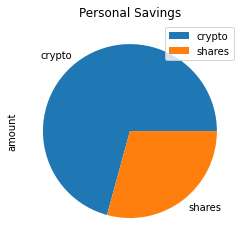

In [51]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Personal Savings")

In [55]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund

# Calculate total amount of savings
total_savings_amt = crypto + shares
total_savings_amt

# Validate saving health
if total_savings_amt > emergency_fund: 
    print("Congratulations, You have been saving well")
elif total_savings_amt==emergency_fund:
     print("Congratulations, You have reached your financial goal")
else:
    print(f"YOU NEED TO SAVE $",emergency_fund - total_savings_amt, "MORE")

Congratulations, You have been saving well


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [78]:
# Get 5 years' worth of historical data for SPY and AGG
timeframe = "1D"

start_date = pd.Timestamp('2016-03-20', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-20', tz='America/New_York').isoformat()

tickers = ["AGG","SPY"]

df_stock_data = api_object.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.tail()

AGG                                       \
                             open      high     low   close     volume   
time                                                                     
2021-03-15 00:00:00-04:00  113.60  114.0100  113.60  113.94  4210749.0   
2021-03-16 00:00:00-04:00  113.97  114.0320  113.78  113.87  3977851.0   
2021-03-17 00:00:00-04:00  113.55  113.9778  113.48  113.87  5023810.0   
2021-03-18 00:00:00-04:00  113.32  113.8600  113.20  113.42  6077516.0   
2021-03-19 00:00:00-04:00  113.40  113.5400  113.33  113.50  4674852.0   

                               SPY                                       
                              open     high     low   close      volume  
time                                                                     
2021-03-15 00:00:00-04:00  394.330  396.685  392.03  396.47  64471980.0  
2021-03-16 00:00:00-04:00  397.070  397.830  395.08  395.94  65719794.0  
2021-03-17 00:00:00-04:00  394.530  398.120  393.30  397.22  61876016.0  
2021-03-18 00:00:00-04:00  394.475  396.720  390.75  391.41  98794050.0  
2021-03-19 00:00:00-04:00  389.880  391.569  387.15  389.50  93819590.0

In [79]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [89]:
# Printing the simulation input data
MC_30.portfolio_data.tail()

AGG                                       \
                             open      high     low   close     volume   
time                                                                     
2021-03-15 00:00:00-04:00  113.60  114.0100  113.60  113.94  4210749.0   
2021-03-16 00:00:00-04:00  113.97  114.0320  113.78  113.87  3977851.0   
2021-03-17 00:00:00-04:00  113.55  113.9778  113.48  113.87  5023810.0   
2021-03-18 00:00:00-04:00  113.32  113.8600  113.20  113.42  6077516.0   
2021-03-19 00:00:00-04:00  113.40  113.5400  113.33  113.50  4674852.0   

                                            SPY                           \
                          daily_return     open     high     low   close   
time                                                                       
2021-03-15 00:00:00-04:00     0.001318  394.330  396.685  392.03  396.47   
2021-03-16 00:00:00-04:00    -0.000614  397.070  397.830  395.08  395.94   
2021-03-17 00:00:00-04:00     0.000000  394.530  398.120  393.30  397.22   
2021-03-18 00:00:00-04:00    -0.003952  394.475  396.720  390.75  391.41   
2021-03-19 00:00:00-04:00     0.000705  389.880  391.569  387.15  389.50   

                                                    
                               volume daily_return  
time                                                
2021-03-15 00:00:00-04:00  64471980.0     0.006039  
2021-03-16 00:00:00-04:00  65719794.0    -0.001337  
2021-03-17 00:00:00-04:00  61876016.0     0.003233  
2021-03-18 00:00:00-04:00  98794050.0    -0.014627  
2021-03-19 00:00:00-04:00  93819590.0    -0.004880

In [81]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005424,0.988722,1.001655,1.006452,0.996455,1.011249,0.990610,1.012743,0.987728,1.007918,...,1.006339,1.004736,1.002927,1.014622,1.014239,0.990436,0.993269,0.998915,1.009785,1.001705
2,1.005857,0.985002,0.994371,1.003097,0.996887,1.002239,0.999562,1.006439,0.989548,1.000453,...,1.003600,0.995707,0.996597,1.001697,1.028873,0.992266,0.997692,0.998977,1.007557,1.015186
3,0.995298,0.978711,0.993189,1.013774,0.999018,1.003493,1.008794,1.008226,0.986850,1.000446,...,1.004583,1.000490,0.993951,0.998030,1.020838,0.980131,0.994021,1.006414,1.004889,1.025763
4,0.990941,0.977200,0.989691,1.032808,1.005751,0.993535,1.001198,1.015583,0.974317,1.008716,...,0.994710,1.004098,0.994845,0.989035,1.015959,0.987736,1.000425,1.003349,0.993413,1.031552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,14.866675,8.863395,14.444101,65.400686,5.481209,19.388365,79.399368,5.511784,8.291699,29.221802,...,9.547870,42.995216,32.250297,30.947339,8.939382,8.102530,15.052395,14.311355,5.787628,6.658581
7557,14.911702,8.816651,14.358505,65.335161,5.499318,19.525701,79.751634,5.509724,8.336096,29.348952,...,9.598771,43.063832,32.416780,30.852047,9.000694,8.123746,15.046466,14.157159,5.815379,6.651917
7558,14.922617,8.786486,14.282396,65.646195,5.466964,19.400318,79.752894,5.522111,8.206189,29.420498,...,9.623761,43.719851,32.306590,31.040768,9.075536,8.079872,15.093405,14.324088,5.751889,6.559711
7559,14.904234,8.841017,14.372800,66.117501,5.506178,19.510073,78.567433,5.518487,8.321648,29.464877,...,9.658467,44.032786,32.342376,31.193354,9.131231,8.155850,14.984831,14.294731,5.767990,6.665615


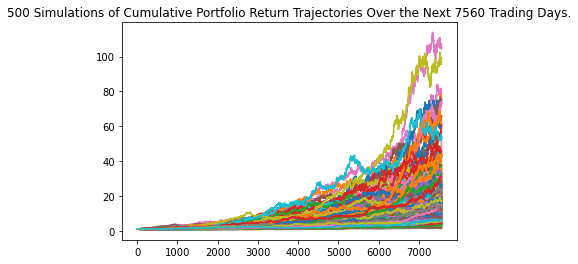

In [82]:
# Plot simulation outcomes
line_plot = MC_30.plot_simulation()

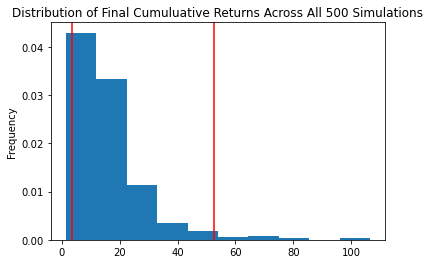

In [83]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30.plot_distribution()

### Retirement Analysis

In [84]:
# Fetch summary statistics from the Monte Carlo simulation results
summ_30 = MC_30.summarize_cumulative_return()

# Print summary statistics
print(summ_30)

count           500.000000
mean             16.341693
std              13.056947
min               1.354238
25%               8.378357
50%              12.906283
75%              19.499738
max             106.581579
95% CI Lower      3.551505
95% CI Upper     52.610376
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [85]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summ_30[8]*20000,2)
ci_upper = round(summ_30[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $71030.1 and $1052207.53


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [87]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summ_30[8]*initial_investment,2)
ci_upper = round(summ_30[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $106545.14 and $1578311.29
